In [1]:
# SETUP
import sklearn
import tensorflow as tf

import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
from tensorflow import keras

In [3]:
# Lets check out the version
tf.__version__, keras.__version__

('2.4.1', '2.4.0')

In [4]:
# Loading the dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full), (X_test,y_test) = fashion_mnist.load_data()

In [5]:
# Lets check out shapes and dtypes
print(X_train_full.shape, X_train_full.dtype)

(60000, 28, 28) uint8


In [6]:
print(y_train_full.shape, y_train_full.dtype)

(60000,) uint8


Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [7]:
X_valid, X_train = X_train_full[:5000] /255.0 , X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0 

In [8]:
# defining the class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names[y_train[0]]

'Coat'

In [10]:
X_valid.shape

(5000, 28, 28)

In [11]:
X_test.shape

(10000, 28, 28)

In [12]:
# Building the model using sequential API
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax')) # output layer

2022-05-19 19:54:05.985292: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-05-19 19:54:05.985448: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-19 19:54:05.986327: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [13]:
# lets setup the backend
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [14]:
# This is valid too for buidling sequential models

# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28]),
#     keras.layers.Dense(300, activation="relu"),
#     keras.layers.Dense(100, activation="relu"),
#     keras.layers.Dense(10, activation="softmax")
# ])

In [15]:
model.layers

In [16]:
# checking out model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


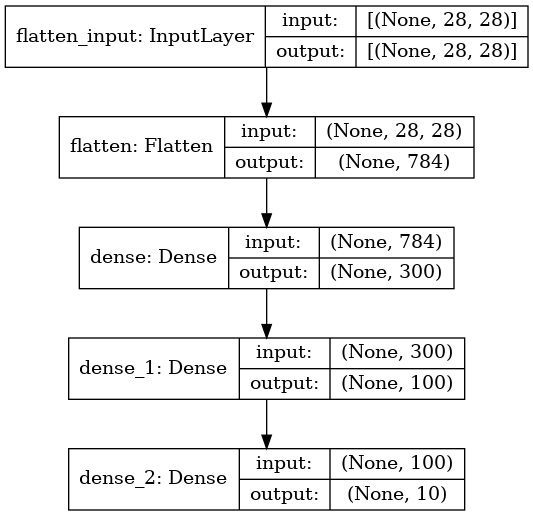

In [17]:
# you can plot the model too
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [18]:
# Here NONE means, the batch size can be anything!

In [19]:
# every layer has a name
hidden1 = model.layers[1]
hidden1.name

'dense'

In [20]:
model.get_layer(hidden1.name) is hidden1

True

In [21]:
# You can check the weights and biases of each layers
weights, biases = hidden1.get_weights()

In [22]:
weights.shape

(784, 300)

In [23]:
biases.shape

(300,)

In [24]:
# Lets compile our model now
model.compile(
    loss=keras.losses.sparse_categorical_crossentropy,
    optimizer=keras.optimizers.SGD(),
    metrics=[keras.metrics.sparse_categorical_accuracy]
)

In [25]:
# fit method returns history 
history = model.fit(X_train,y_train,epochs=30,\
    validation_data=(X_valid,y_valid))

2022-05-19 19:59:01.234034: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-05-19 19:59:01.240265: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2903995000 Hz


Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 1.0310 - sparse_categorical_accuracy: 0.6766 - val_loss: 0.5140 - val_sparse_categorical_accuracy: 0.8286
Epoch 2/30
1719/1719 [==============================] - 9s 6ms/step - loss: 0.5065 - sparse_categorical_accuracy: 0.8245 - val_loss: 0.4360 - val_sparse_categorical_accuracy: 0.8528
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4536 - sparse_categorical_accuracy: 0.8421 - val_loss: 0.5119 - val_sparse_categorical_accuracy: 0.8104
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4253 - sparse_categorical_accuracy: 0.8517 - val_loss: 0.3975 - val_sparse_categorical_accuracy: 0.8644
Epoch 5/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4123 - sparse_categorical_accuracy: 0.8568 - val_loss: 0.3823 - val_sparse_categorical_accuracy: 0.8702
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3827 - spa

In [26]:
# history contains some useful information
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [28]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [30]:
history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

Saving figure keras_learning_curves_plot


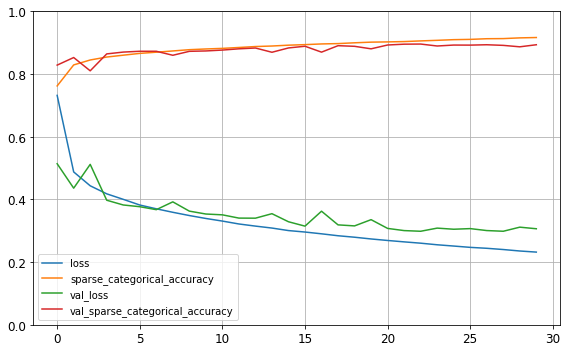

In [32]:
# Lets plot the learning curve
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
save_fig("keras_learning_curves_plot")
plt.show()

In [33]:
# lets evaluate the model on the test set
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3430 - sparse_categorical_accuracy: 0.8803


[0.3429844081401825, 0.880299985408783]

In [34]:
# lets predict
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.03, 0.  , 0.94],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [35]:
# to get the class with highest probability
y_pred = np.argmax(model.predict(X_new),axis=-1) # row wise
y_pred

array([9, 2, 1])

In [36]:
np.array(class_names)[y_pred] # fancy indexing right here

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

### Regression MLP

In [37]:
# lets load,split and scale the california housing dataset
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

# train-valid-test split 
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)


In [38]:
# a bit of preprocessing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [39]:
# setting up random seed
np.random.seed(42)
tf.random.set_seed(42)

In [42]:
X_train.shape, X_train.shape[1:]

((11610, 8), (8,))

In [43]:
# buidling the model
model = keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=X_train.shape[1:]),
    keras.layers.Dense(1) # as this is a regression problem
])

In [44]:
# lets compile the model now
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [45]:
# training the model
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 2s 5ms/step - loss: 2.2656 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 2s 4ms/step - loss: 0.7413 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6604 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6245 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5770 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5609 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5500 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5200 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5051 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4910 - val_loss: 0.4656

In [46]:
# evaluating the model
mse_test = model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4212


In [47]:
# predicting
X_new = X_test[:3]
y_pred = model.predict(X_new)

In [48]:
y_pred

array([[0.38856632],
       [1.6792021 ],
       [3.1022794 ]], dtype=float32)

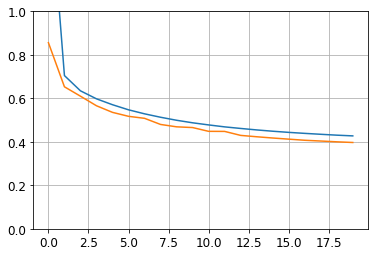

In [49]:
# plotting the learning curve
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Functional API